In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from helpers import *
from Logistic import *

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from time import time

In [2]:
# global param
verbose = 2
cv = 5
seed = 42
n_jobs = None
y, X, ids = load_csv_data("Counts_n10000_k5_s5000.csv")

Loading data...
Removing rows with less than n_min counts...
Counts to frequencies...
Data loaded!


No regularization

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [18]:
rf = LogisticRegression(penalty='none', C = 10, max_iter=1000)
rf.fit(X_train, y_train)

/Users/anita/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/anita/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [3]:
t1 = time()
df = grid_search_LogReg(X, y, seed, n_jobs, cv=cv, verbose=verbose, figtitle='plots/LogReg.pdf')
t2 = time()
print(t2-t1)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=1.0, total=   0.8s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ............................................ C=1.0, total=   0.8s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   0.7s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   1.1s
[CV] C=1.0 ...........................................................
[CV] ............................................ C=1.0, total=   1.1s
[CV] C=10.0 ..........................................................
[CV] ........................................... C=10.0, total=   1.7s
[CV] C=10.0 ..........................................................
[CV] ........................................... C=10.0, total=   2.1s
[CV] C=10.0 ..........................................................
[CV] ........................................... C=10.0, total=   2.0s
[CV] C=10.0 ..........................................................
[CV] .

KeyboardInterrupt: 

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=1.0, total=   0.6s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ............................................ C=1.0, total=   0.5s
[CV] C=5.623413251903491 .............................................
[CV] .............................. C=5.623413251903491, total=   0.8s
[CV] C=5.623413251903491 .............................................
[CV] .............................. C=5.623413251903491, total=   1.0s
[CV] C=31.622776601683793 ............................................
[CV] ............................. C=31.622776601683793, total=   1.7s
[CV] C=31.622776601683793 ............................................
[CV] ............................. C=31.622776601683793, total=   1.8s
[CV] C=177.82794100389228 ............................................
[CV] ............................. C=177.82794100389228, total=   3.8s
[CV] C=177.82794100389228 ............................................
[CV] ............................. C=177.82794100389228, total=   4.1s
[CV] C=1000.0 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.6s finished


{'C': 1.0}
{'C': 5.623413251903491}
{'C': 31.622776601683793}
{'C': 177.82794100389228}
{'C': 1000.0}


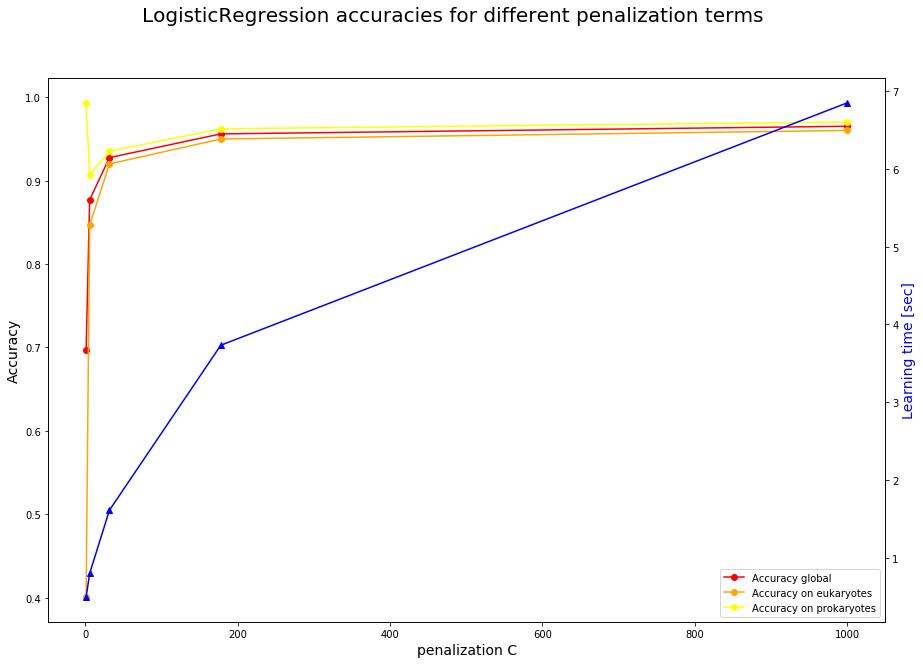

,C,accuracy,procaryote accuracy,eukaryote accuracy,learning time
0,1.000000,0.696849,0.993196,0.400502,0.492062
1,5.623413,0.876866,0.907044,0.846687,0.795714
2,31.622777,0.927578,0.935161,0.919995,1.609933
3,177.827941,0.956035,0.962177,0.949892,3.732201
4,1000.000000,0.965180,0.970182,0.960177,6.849374


In [23]:
Cs = np.logspace(0, 3, 5)
param_grid = {'C': Cs}
param_grid_no = {'penalty':['none']}

# define the scoring functions
scorings = {'accuracy': make_scorer(balanced_accuracy_score),
    'eukaryote_accuracy':make_scorer(euk_accuracy),
    'procaryote_accuracy':make_scorer(pro_accuracy)}

# perform the grid search
lr = LogisticRegression(max_iter=10000, random_state=seed, n_jobs=n_jobs)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=2,
                            scoring=scorings, refit='accuracy', verbose=verbose)
grid_search.fit(X, y)

# store the result in a dataframe
df = pd.DataFrame(columns=['C', 'accuracy', 'procaryote accuracy', 'eukaryote accuracy', 'learning time'])
for i, trial in enumerate(grid_search.cv_results_['params']):
    trial = grid_search.cv_results_['params'][i]
    print(trial)
    trial['learning time'] = grid_search.cv_results_['mean_fit_time'][i]
    trial['accuracy'] = grid_search.cv_results_['mean_test_accuracy'][i]
    trial['procaryote accuracy'] = grid_search.cv_results_['mean_test_procaryote_accuracy'][i]
    trial['eukaryote accuracy'] = grid_search.cv_results_['mean_test_eukaryote_accuracy'][i]

    df = df.append(trial, ignore_index=True)

plot_LogReg(df, 'log_reg_test.pdf')
df

In [30]:
# without penalization
log_reg_no = LogisticRegression(penalty='none', max_iter=10000, random_state=seed, n_jobs=n_jobs)
t1 = time()
print(cross_val_score(log_reg_no, X, y, scoring=make_scorer(balanced_accuracy_score), cv=2, verbose=2))
t2 = time()
print(t2 - t1)
print(cross_val_score(log_reg_no, X, y, scoring=make_scorer(euk_accuracy), cv=2, verbose=2))
t3 = time()
print(t3 - t2)
print(cross_val_score(log_reg_no, X, y, scoring=make_scorer(pro_accuracy), cv=2, verbose=2))
t4 = time()
print(t4 - t3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  48.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.3s remaining:    0.0s


[CV] ................................................. , total= 1.3min
[0.94870953 0.94099244]
125.99754595756531
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 1.6min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ................................................. , total= 1.5min
[0.94044487 0.92681177]
186.8277530670166
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 1.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV] ................................................. , total= 1.6min
[0.95697418 0.9551731 ]
168.2373878955841


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min finished


In [ ]:
grid_search.cv_results_

In [10]:
grid_search_no.cv_results_

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=1.0, total=   0.8s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ............................................ C=1.0, total=   0.7s
[CV] C=10.0 ..........................................................
[CV] ........................................... C=10.0, total=   1.0s
[CV] C=10.0 ..........................................................
[CV] ........................................... C=10.0, total=   1.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': array([ 1., 10.])},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False,
             scoring={'accuracy': make_scorer(balanced_accuracy_score),
                      'eukaryote_accuracy': make_scorer(euk_accuracy),
                      'procaryote_accuracy': make_scorer(pro_accuracy)},
    

In [ ]:
# store the result in a dataframe
df = pd.DataFrame(columns=['C', 'accuracy', 'procaryote accuracy', 'eukaryote accuracy', 'learning time'])
for i, trial in enumerate(grid_search.cv_results_['params']):
    trial = grid_search.cv_results_['params'][i]
    print(trial)
    trial['learning time'] = grid_search.cv_results_['mean_fit_time'][i]
    trial['accuracy'] = grid_search.cv_results_['mean_test_accuracy'][i]
    trial['procaryote accuracy'] = grid_search.cv_results_['mean_test_procaryote_accuracy'][i]
    trial['eukaryote accuracy'] = grid_search.cv_results_['mean_test_eukaryote_accuracy'][i]

    df = df.append(trial, ignore_index=True)


# plot_LogReg(df, figtitle)
df

In [ ]:
# store the result in a dataframe
df_no = pd.DataFrame(columns=['C', 'accuracy', 'procaryote accuracy', 'eukaryote accuracy', 'learning time'])
for i, trial in enumerate(grid_search_no.cv_results_['params']):
    trial = grid_search_no.cv_results_['params'][i]
    print(trial)
    trial['learning time'] = grid_search_no.cv_results_['mean_fit_time'][i]
    trial['accuracy'] = grid_search_no.cv_results_['mean_test_accuracy'][i]
    trial['procaryote accuracy'] = grid_search_no.cv_results_['mean_test_procaryote_accuracy'][i]
    trial['eukaryote accuracy'] = grid_search_no.cv_results_['mean_test_eukaryote_accuracy'][i]

    df_no = df_no.append(trial, ignore_index=True)


# plot_LogReg(df, figtitle)
df_no

In [18]:
grid_search2.cv_results_

{'mean_fit_time': array([0.62562156, 0.98974133]),
 'std_fit_time': array([0.05150056, 0.07639265]),
 'mean_score_time': array([0.11676848, 0.10244727]),
 'std_score_time': array([0.01234448, 0.00269103]),
 'param_C': masked_array(data=[1.0, 10.0],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1.0}, {'C': 10.0}],
 'split0_test_accuracy': array([0.69617425, 0.8959401 ]),
 'split1_test_accuracy': array([0.69752394, 0.89757045]),
 'mean_test_accuracy': array([0.69684909, 0.89675527]),
 'std_test_accuracy': array([0.00067485, 0.00081517]),
 'rank_test_accuracy': array([2, 1], dtype=int32),
 'split0_test_eukaryote_accuracy': array([0.39775173, 0.87993303]),
 'split1_test_eukaryote_accuracy': array([0.40325281, 0.88519493]),
 'mean_test_eukaryote_accuracy': array([0.40050227, 0.88256398]),
 'std_test_eukaryote_accuracy': array([0.00275054, 0.00263095]),
 'rank_test_eukaryote_accuracy': array([2, 1], dtype=int32),
 'split0_test_procar

In [14]:
grid_search

GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([ 1., 10.])}, {'penalty': ['none']}],
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False,
             scoring={'accuracy': make_scorer(balanced_accuracy_score),
                      'eukaryote_accuracy': make_scorer(euk_accuracy),
                      'procaryote_accur

In [15]:
grid_search2

GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': array([ 1., 10.])},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False,
             scoring={'accuracy': make_scorer(balanced_accuracy_score),
                      'eukaryote_accuracy': make_scorer(euk_accuracy),
                      'procaryote_accuracy': make_scorer(pro_accuracy)},
    

In [32]:
cv = 2
Cs = np.logspace(0, 3, 2)
param_grid = {'C': Cs}

# define the scoring functions
scorings = {'accuracy': make_scorer(balanced_accuracy_score),
    'eukaryote_accuracy':make_scorer(euk_accuracy),
    'procaryote_accuracy':make_scorer(pro_accuracy)}

# perform the grid search
lr = LogisticRegression(max_iter=10000, random_state=seed, n_jobs=n_jobs)
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv,
                            scoring=scorings, refit='accuracy', verbose=verbose)
grid_search.fit(X, y)

# store the result in a dataframe
df = pd.DataFrame(columns=['C', 'accuracy', 'procaryote accuracy', 'eukaryote accuracy', 'learning time'])
for i, trial in enumerate(grid_search.cv_results_['params']):
    trial = grid_search.cv_results_['params'][i]
    trial['learning time'] = grid_search.cv_results_['mean_fit_time'][i]
    trial['accuracy'] = grid_search.cv_results_['mean_test_accuracy'][i]
    trial['procaryote accuracy'] = grid_search.cv_results_['mean_test_procaryote_accuracy'][i]
    trial['eukaryote accuracy'] = grid_search.cv_results_['mean_test_eukaryote_accuracy'][i]

    df = df.append(trial, ignore_index=True)

# plot_LogReg(df, figtitle)

# compare with no regularisation
log_reg_no = LogisticRegression(penalty='none', max_iter=10000, random_state=seed, n_jobs=n_jobs)
acc = cross_val_score(log_reg_no, X, y, scoring=make_scorer(balanced_accuracy_score), cv=cv, verbose=verbose)
euk_acc = cross_val_score(log_reg_no, X, y, scoring=make_scorer(euk_accuracy), cv=cv, verbose=verbose)
pro_acc = cross_val_score(log_reg_no, X, y, scoring=make_scorer(pro_accuracy), cv=cv, verbose=verbose)
no_pen = {'C':'infinity', 'accuracy':acc, 'procaryote accuracy':pro_acc, 'eukaryote accuracy':euk_acc, 'learning time':NaN}

df = df.append(no_pen, ignore_index=True)

df

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................................ C=1.0, total=   0.7s
[CV] C=1.0 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ............................................ C=1.0, total=   0.7s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   4.7s
[CV] C=1000.0 ........................................................
[CV] ......................................... C=1000.0, total=   3.6s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total= 1.0min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min remaining:    0.0s


[CV] ................................................. , total= 1.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 1.1min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................................................. , total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 1.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ................................................. , total= 2.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.5min finished


NameError: name 'NaN' is not defined

In [33]:
no_pen = {'C':'infinity', 'accuracy':acc, 'procaryote accuracy':pro_acc, 'eukaryote accuracy':euk_acc, 'learning time':None}

df = df.append(no_pen, ignore_index=True)

df

,C,accuracy,procaryote accuracy,eukaryote accuracy,learning time
0,1,0.696849,0.993196,0.400502,0.597821
1,1000,0.96518,0.970182,0.960177,4.03059
2,infinity,"[0.9487095270795579, 0.9409924356910248]","[0.9569741845107064, 0.9551731038623174]","[0.9404448696484095, 0.9268117675197322]",None
